In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_3_data_fitting.ipynb")

# Lab week 3: Data fitting to see if we can detect a pick success y/n

Can you use the finger 1 stop time and max value to tell the difference between a successful and a failed pick?
Lab slides: https://docs.google.com/presentation/d/1NtoXYbl2nq1dkIU0KQE8ogjSCfb22wgLigY3JJpHHGI/edit?usp=sharing


In [2]:
# Doing the imports for you
import numpy as np
import json as json
from scipy.stats import linregress
import matplotlib.pyplot as plt
import csv
from numpy.polynomial import polynomial
import math

## Read the data in 

In [3]:
# Read the same data in as for pre_lecture_3.py data in and put it in the data_ variables

# Read in week3_Motor position f1_success and failed
data_success_from_csv = np.loadtxt("Data/Week3_Motor position f1_successful.csv", delimiter=',')
pick_data_success = data_success_from_csv

data_fail_from_csv = np.loadtxt("Data/Week3_Motor position f1_failed.csv", delimiter=',')
pick_data_fail = data_fail_from_csv

data_successful = pick_data_success
data_failed = pick_data_fail
# END PROMPT"""


In [4]:
grader.check("Read data")

Read data results: All test cases passed!

## Box plot of fitted lines for all data

In the pre-lecture you fit a line to just one row (each) of the successful versus failed picks. In this lab you'll fit the line to ALL of the picks. For each pick, save the end point (time at the y_max value and the y_max value). You'll be making a box plot of this data to see if it looks different for successful versus failed picks.

Why a box plot? Box plots are better for visually showing multiple distributions in the same plot, where they can be compared side-by-side

See lab slides for what this should look like when you're done.

In [5]:
time_step = 1/30
def fit_line_to_middle_bit(ts, ys, eps=1e-2):
# TODO: get the fit_line_to_middle_bit function, either by copying it over here, or importing it from a .py file
#. Optional (import):
# from pre_lecture_3_fitting import fit_line_to_middle_bit
# Otherwise, copy function here
    y_min = np.min(ys)
    y_max= np.max(ys)

    start = np.where( ys > y_min + eps * (y_max - y_min))[0][0]
    end = np.where( ys < y_max - eps * (y_max - y_min))[0][-1]

    select_ts = ts[ start: end +1]
    select_ys = ys[ start: end +1]

    slope, intercept , r_value, p_value, std_err = linregress( select_ts, select_ys )

    x_min = (y_min - intercept) / slope
    x_max = (y_max - intercept) / slope

    return (x_min, y_min), (x_max, y_max)

# TODO: Check that it works
#. - Create t values
#  - Call fit_line_to_middle_bit with the first row of the successful data and see if your answers
#. match the answers from pre-lecture
# END PROMPT"""


In [6]:

# TODO:
#  Create a function that loops over all of the rows of the data and accumulates the start and end times
#. in an nx2 array of t (first row) and y (second row)
# I'd recommend a function that takes both the t values and the data, so you don't have to keep recomputing
#.  the t values
#. def fit_middle_all(ts, data)
def fit_middle_all(ts, data ):
    array = np.zeros([data.shape[0], 2 ])
    for i in range (data.shape[0]):
        start_pt, end_pt = fit_line_to_middle_bit(ts, data[i,:])
        array[i,:] = end_pt
    return array
#.    make numpy array to put data in (nx2)
#.    for each row in data
#.       start_pt, end_pt = fit_line_to_middle_bit(ts, current row)
#        copy end_pt information into appropriate row in nx2 output
#. return nx2 numpy array
# END PROMPT"""

In [7]:
# TODO:
#  Create a function that computes the 
# nx2 arrays of t, y values of end point of fitted line

# END PROMPT"""

# Should print Mean successful [3.98791579e-01 4.07402569e+02] and failed [  0.40810473 392.76044707]

In [8]:
# Check that it works properly

# TODO:
#  Create the t values
ts = np.arange(start = 0, stop = data_successful.shape[1] * time_step, step = time_step)
#. Call your function twice, once with the successful data, once with the failed
end_times_successful = fit_middle_all( ts, data_successful)
end_times_failed = fit_middle_all( ts, data_failed)
print(f"Mean successful {np.mean(end_times_successful, 0)} and failed {np.mean(end_times_failed, 0)}")
# END PROMPT"""

Mean successful [3.98791579e-01 4.07402569e+02] and failed [  0.40810473 392.76044707]


In [9]:
grader.check("Fitted line code")

Fitted line code results: All test cases passed!

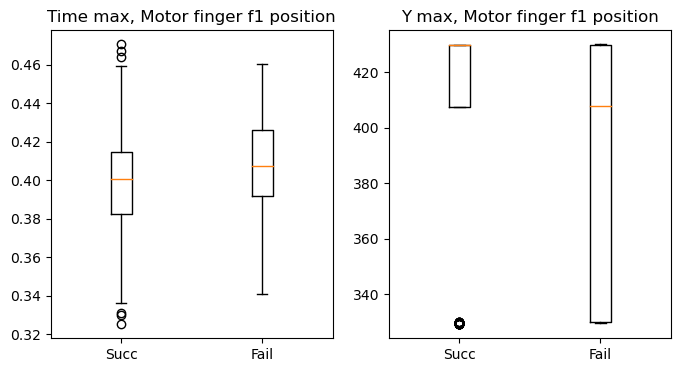

In [10]:
# Two plots
n_rows = 1
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 4))


axs[0].boxplot(end_times_successful[:,0], positions = [0], labels = ['Succ'])
axs[0].boxplot(end_times_failed[:,0], positions = [1], labels = ['Fail'])           
axs[0].set_title(f"Time max, Motor finger f1 position")

axs[1].boxplot(end_times_successful[:,1], positions = [0], labels = ['Succ'])
axs[1].boxplot(end_times_failed[:,1], positions = [1], labels = ['Fail'])           
axs[1].set_title(f"Y max, Motor finger f1 position")
plt.show()

# Do the box plots...
# END PROMPT"""

<!-- END QUESTION -->

# Part 2: Fitting a curve to the wrist force data

## First step: Getting the data


The wrist force data has three channels (x,y,z). For this assignment, we want to get out the total summed force at the wrist, rather than each channel individually:

Equation: **sqrt (sum x,y,z (wrist force data)^2)**

Just like the last problem, the data has already been extracted from the proxy_pick_data.csv file and output for you (week3_Wrist force_summed_*.csv). 

Optional: Do this extraction yourself. Read in wrist force data, sum it, and write it out to two csv files (one for successful, one for failed). Feel free to swipe code from Lecture_3_data_analysis.ipynb to do this.

In [11]:

# TODO: Read in the data from Data/week3_Wrist_force summed*.csv (successful and failed)
# TODO: Optional: Read in the pick data and its description file, extract out the rows and columns you
#. care about, and write that data out (should be same as the .csv files)
data_from_Wrist_force_success_csv = np.loadtxt("Data/week3_Wrist force_summed_successful.csv", dtype="float", delimiter=",")
pick_data_Wrist_force_success = data_from_Wrist_force_success_csv

data_from_Wrist_force_fail_csv = np.loadtxt("Data/week3_Wrist force_summed_failed.csv", dtype="float", delimiter=",")
pick_data_Wrist_force_fail = data_from_Wrist_force_fail_csv 

data_wrist_force_successful = pick_data_Wrist_force_success
data_wrist_force_failed = pick_data_Wrist_force_fail
# END PROMPT"""


In [12]:
grader.check("Fit curve")

Fit curve results: All test cases passed!

<!-- BEGIN QUESTION -->

## Second step: Fit a cubic to the wrist force data (18 rows each successful/failed)

Split by successful and failed.

TODO: See slides for what the final plots should look like. I've handled the for loop and the plot indexing for you.

At this point, you should have the data in the form ts, ys for both the successful and the failed data. 

Where you're headed (pseudo code)

for 18 rows of data

    Fit a cubic polynomial to the data
    
    Plot the original data plus the fitted polynomial
    
       First three rows: successful, last three rows: failed

Implementation steps: You could write a function for doing the polynomial fit, but since there already is one (polynomial.polyval) you probably don't need one.

Steps
- Fit polynomial for one row of data
- Plot it and make sure it looks correct
- Copy that code into the for loop, adjusting for which row (p) and which subplot (axs[r, c])
- Repeat for the failed data

Note: It can take a few seconds to plot.

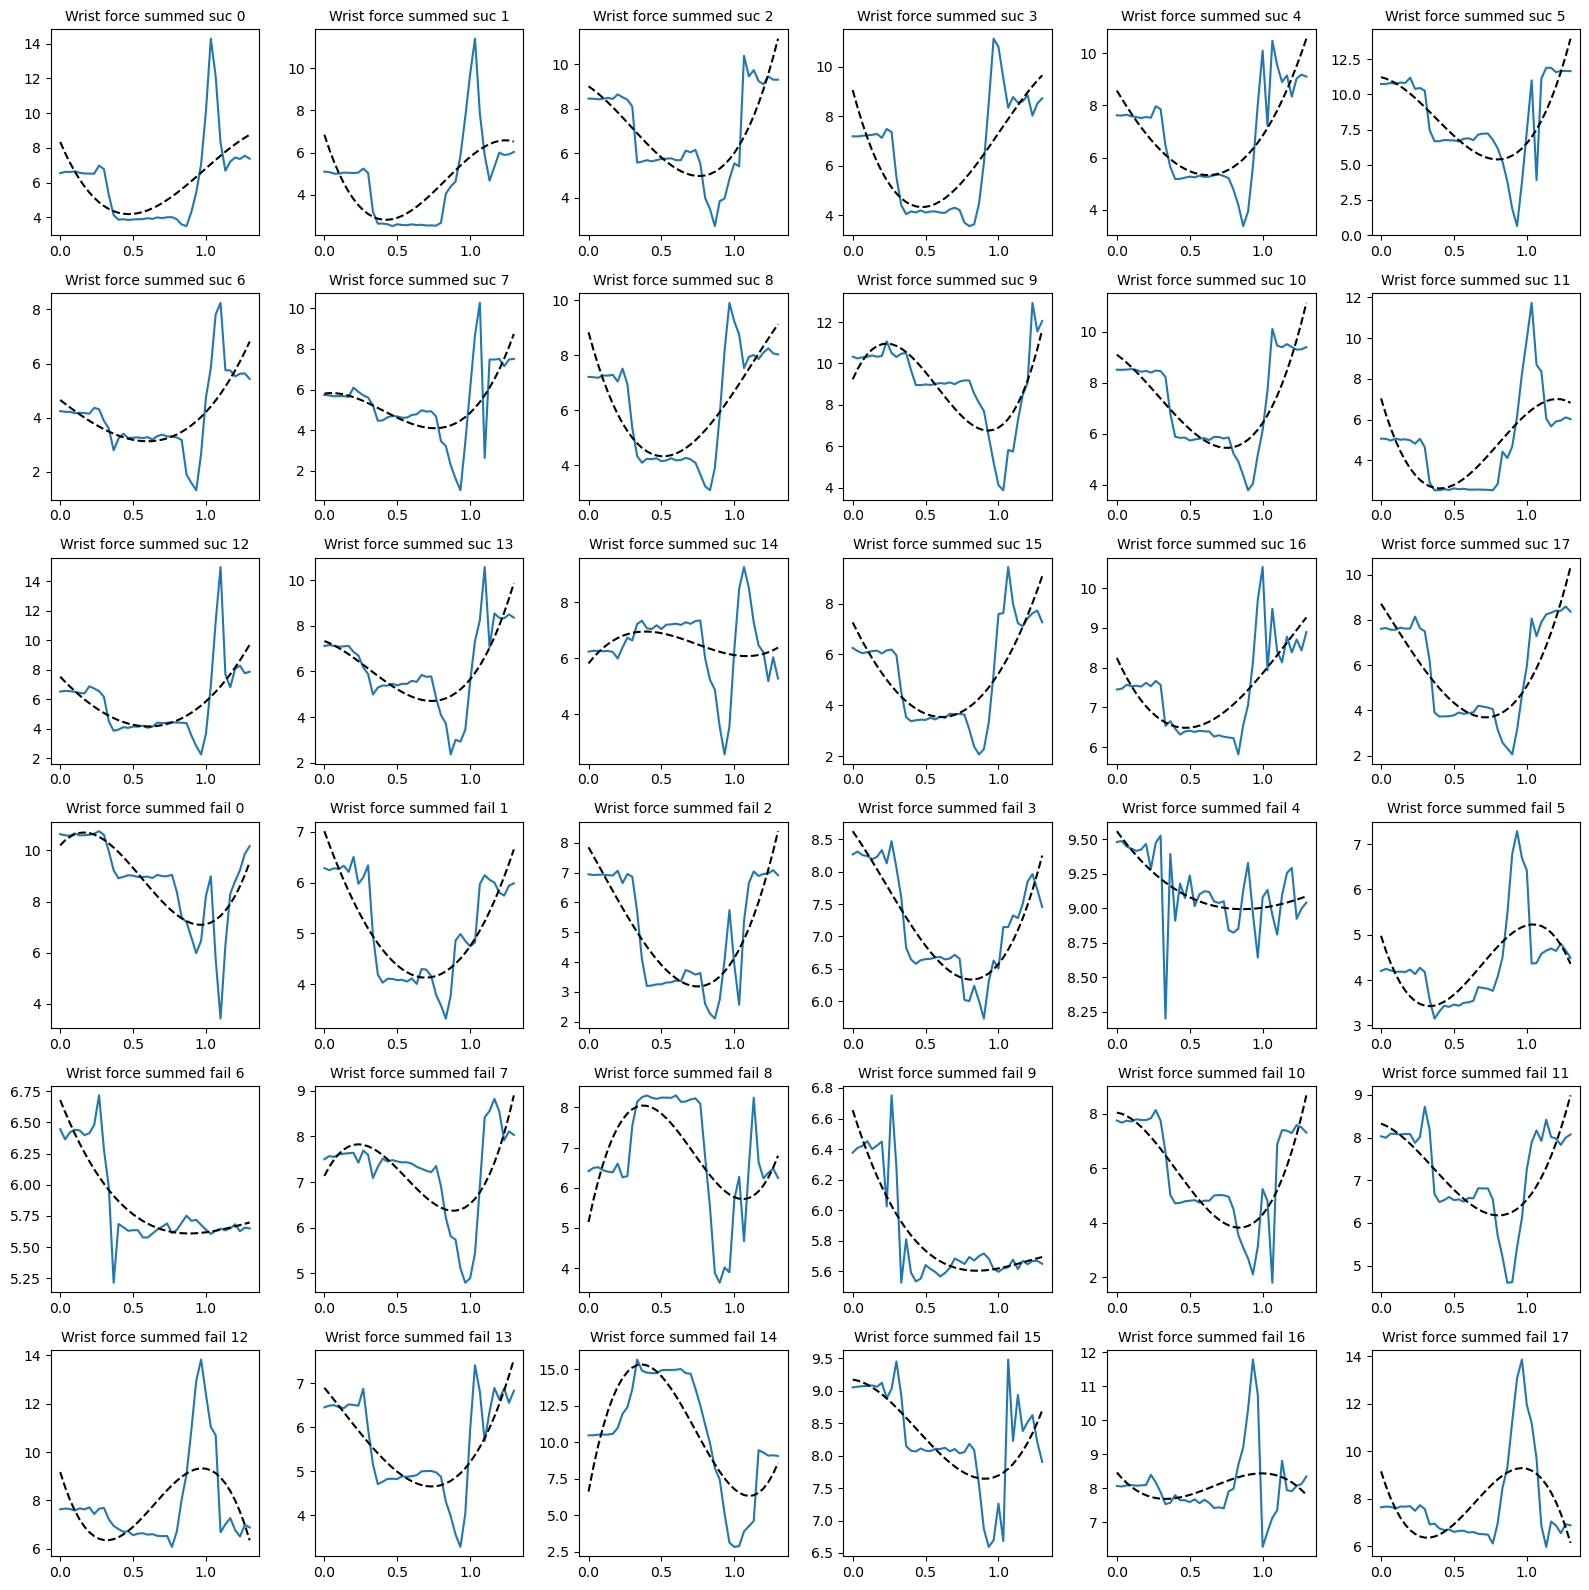

In [13]:
n_rows = 6
n_cols = 6
fig, axs = plt.subplots(n_rows, n_rows, figsize=(16, 16))
ch_name = "Wrist force"

for p in range(0, (n_rows // 2) * n_cols):
    r, c = p // n_cols, p % n_cols
    ys = data_wrist_force_successful[p]
    coefficients = np.polyfit(ts, data_wrist_force_successful[p] , 3)
    fitted_curve = np.polyval(coefficients , ts)
    axs[r, c].plot(ts, data_wrist_force_successful[p])
    axs[r, c].plot(ts, fitted_curve, color = "black",linestyle ='--')
    axs[r, c].set_title(f"{ch_name} summed" + f" suc {p}", fontsize=10)

for p in range(0, (n_rows // 2) * n_cols):
    r, c = 3 + p // n_cols, p % n_cols
    ys = data_wrist_force_failed[p]
    coefficients = np.polyfit(ts, data_wrist_force_failed[p] , 3)
    fitted_curve = np.polyval(coefficients , ts)
    axs[r, c].plot(ts, data_wrist_force_failed[p])
    axs[r, c].plot(ts, fitted_curve, color = "black",linestyle ='--')
    axs[r, c].set_title(f"{ch_name} summed" + f" fail {p}", fontsize=10)

plt.tight_layout()

<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [14]:

# List of names (creates a set)
worked_with_names = {}
# List of URLS (creates a set)
websites = {}
# Approximate number of hours, including lab/in-class time
hours = 10
# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")
for r in range(len(worked_with_names)):
    for c in range(len(websites)):
         wrist_torque_column = 2
         if c == wrist_torque_column:
            print(f"Row: {r}, Time step: {c // n_time_steps}, Successful y/n: {pick_data[r][-1] == 1}, value: {pick_data[r][c]}")
            # Assuming 'your_column_for_wrist_torque' is the column index you are interested in

In [15]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, lab 3 data analysis. Turn in just the .ipynb file - we will supply the data files.

In [16]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

c:\Users\user10\anaconda3\Lib\site-packages\nbconvert\utils\pandoc.py:51: RuntimeWarning: You are using an unsupported version of pandoc (3.1.8).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()


Running your submission against local test cases...




RuntimeError: C:\Users\user10\AppData\Roaming\Python\Python311\site-packages\zmq\_future.py:693: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
